In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("./wine-reviews/winemag-data-130k-v2.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [3]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [74]:
wineries = df["winery"]
wineries_gb = df.groupby("winery").aggregate({"points": ["mean", "median", "count"], "price": ["mean", "min"]})
wineries_gb

points                   price      
                          mean median count       mean   min
winery                                                      
1+1=3                86.666667   87.0     6  18.333333  16.0
10 Knots             83.250000   83.5     4  24.750000  21.0
100 Percent Wine     86.333333   86.0     3  18.000000  18.0
1000 Stories         90.500000   90.5     2  19.000000  19.0
1070 Green           88.000000   88.0     1  25.000000  25.0
...                        ...    ...   ...        ...   ...
Órale                91.000000   91.0     1  30.000000  30.0
Öko                  85.000000   85.0     2  11.000000  11.0
Ökonomierat Rebholz  91.500000   91.0     4  58.250000  45.0
àMaurice             90.550000   90.0    40  38.750000  18.0
Štoka                89.333333   90.0     3  22.000000  20.0

[16757 rows x 5 columns]

In [75]:
wineries_gb.columns

MultiIndex([('points',   'mean'),
            ('points', 'median'),
            ('points',  'count'),
            ( 'price',   'mean'),
            ( 'price',    'min')],
           )

In [81]:
# Some of the best wineries in the world0/.
wineries_gb.loc[(wineries_gb['points',  'count'] >= 3) 
                & (wineries_gb['points',  'mean'] > 95)
                & (wineries_gb['points',  'median'] > 95)].round(2)

points                 price        
                        mean median count     mean     min
winery                                                    
Château Climens        95.75   97.0     4    78.67    40.0
Château Pétrus         96.67   97.0     3  2250.00  2000.0
Château d'Yquem        95.67   97.0     3   800.00   800.0
Colgin                 96.00   95.5     4   243.33   150.0
Dolce                  95.50   95.5     4    82.50    75.0
Domaine des Lambrays   96.00   95.5     4   215.00   215.0
Salon                  96.80   97.0     5   380.60   200.0
Tenuta dell'Ornellaia  96.70   97.0    10   286.50    60.0

In [71]:
df.loc[df.winery == "Château Climens"]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
39377,39377,France,This wine is opulent with rich orange marmalad...,Cyprès,91,40.0,Bordeaux,Barsac,NaN,Roger Voss,@vossroger,Château Climens 2014 Cyprès (Barsac),Bordeaux-style White Blend,Château Climens
45985,45985,France,This is beautully concentrated and full of gre...,NaN,98,70.0,Bordeaux,Barsac,NaN,Roger Voss,@vossroger,Château Climens 2014 Barsac,Bordeaux-style White Blend,Château Climens
58361,58361,France,"The superb palate boasts richness, with honey ...",NaN,96,126.0,Bordeaux,Barsac,NaN,Roger Voss,@vossroger,Château Climens 2009 Barsac,Bordeaux-style White Blend,Château Climens
116096,116096,France,97-99 Barrel sample. A tasting from several ba...,Barrel sample,98,NaN,Bordeaux,Barsac,NaN,Roger Voss,@vossroger,Château Climens 2009 Barrel sample (Barsac),Bordeaux-style White Blend,Château Climens


In [8]:
scores = df['points']
scores.value_counts(dropna=False)

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

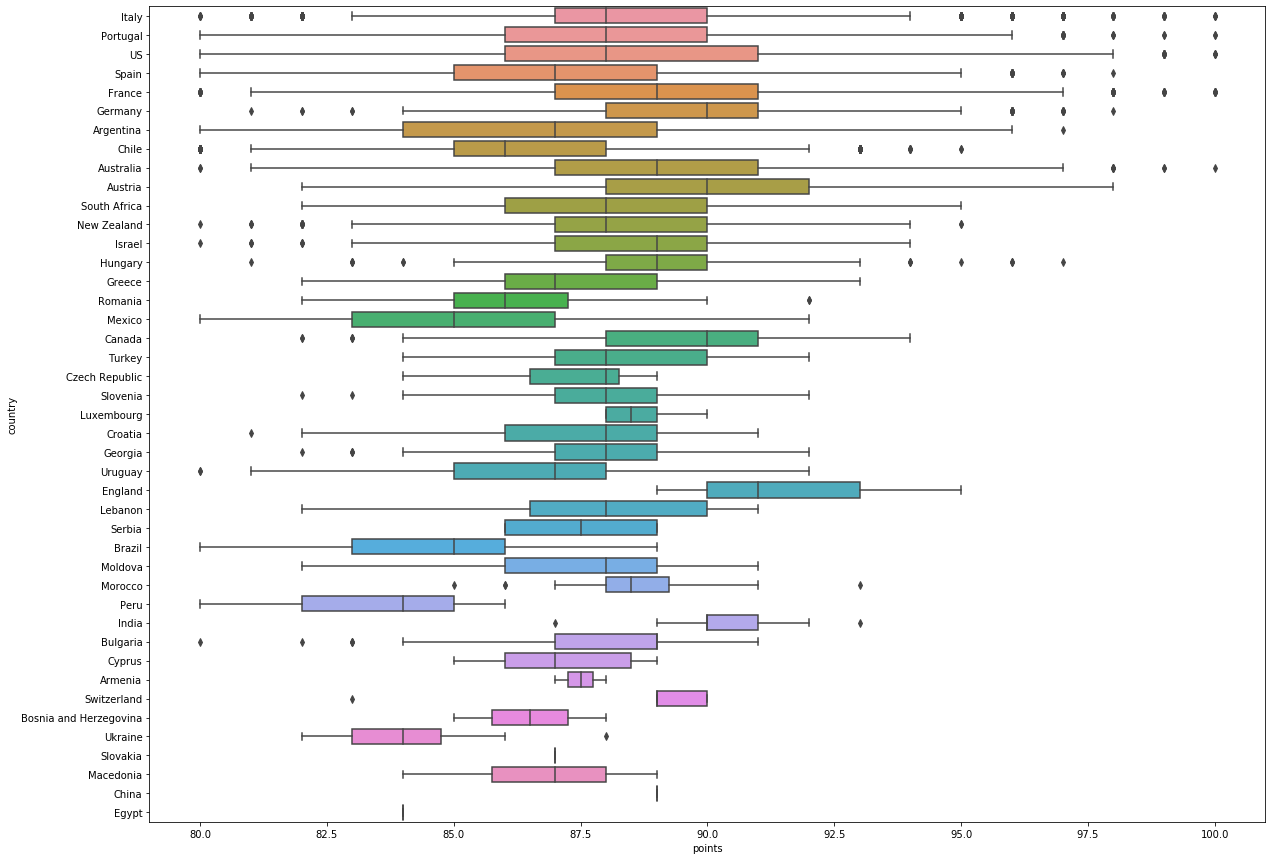

In [21]:
plt.figure(figsize=(20,15))
sns.boxplot(x="points", y="country", data=df)

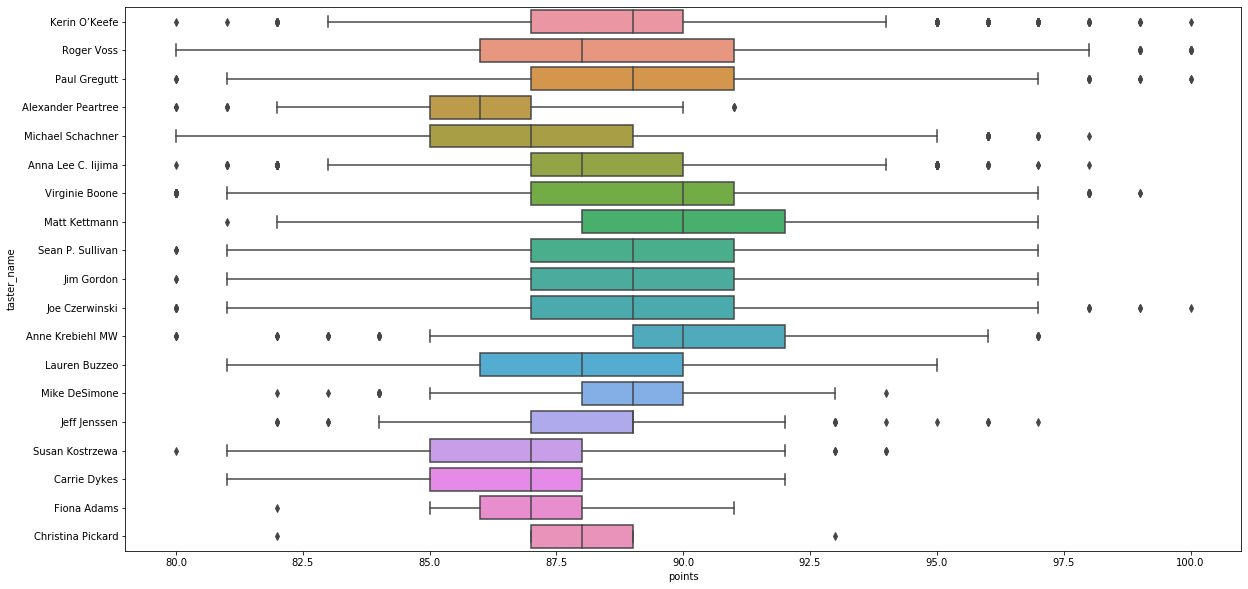

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x="points", y="taster_name", data=df)

In [84]:
yy = df['taster_twitter_handle']
yy.value_counts(dropna=False)

NaN                 31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [88]:
yy = df['taster_name']
yy.value_counts(dropna=False)

NaN                   26244
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [115]:
onehot_tasters = pd.get_dummies(df["taster_name"])
onehot_tasters

,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
129968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
129969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [109]:
prices = np.array(df["price"].fillna(df["price"].median())).reshape(-1,1)

In [121]:
z_scaler = StandardScaler()
prices_scaled = z_scaler.fit_transform(prices)
prices_scaled = pd.Series(prices_scaled.flatten())
prices_scaled

0        -0.243193
1        -0.495310
2        -0.520521
3        -0.545733
4         0.765272
            ...   
129966   -0.167559
129967    1.017388
129968   -0.117135
129969   -0.066712
129970   -0.344040
Length: 129971, dtype: float64

In [116]:
onehot_countries = pd.get_dummies(df["country"])
onehot_countries

,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
129968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
X = pd.concat([prices_scaled, onehot_tasters, onehot_countries], axis=1)
y = df["points"]

In [127]:
len(X), len(y)

(129971, 129971)

In [129]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [130]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [131]:
rf.score(X, y)

0.4478593629687505